# Transcriptome-wide association analysis for motorQTL(self-reported walking pace GWAS)

Genome-wide TWAS results for unadjusted self-reported walking pace GWAS are shown using DLPFC bulk eQTL and single-nucleus eQTLs (astrocytes, excitatory neurons, inhibitory neurons, oligodendrocytes, OPCs, and microglia). Significant associations were defined using two criteria: (i) the most accurate prediction model achieving a TWAS p-value below the Bonferroni-corrected threshold, or (ii) at least half of the tested models producing p-values below this threshold. Each protein is represented by a single point corresponding to the method yielding the smallest p-value. Signals supported by Mendelian randomization analyses are annotated, although no gene is both TWAS and MR significant.

In [2]:
library(ggplot2)
library(ggrepel)
library(dplyr)

# Add a column for MR significance (example: FDR < 0.05)
df <- readRDS('data//TWAS_manhattan_plot_data.rds')$df
unadj_cutoff <- readRDS('data//TWAS_manhattan_plot_data.rds')$unadj_cutoff
axis_df <- readRDS('data//TWAS_manhattan_plot_data.rds')$axis_df
DLPFC = df |> filter(!context %in% c("monocyte_ROSMAP_eQTL", "PCC_DeJager_eQTL", "AC_DeJager_eQTL"))
p <- ggplot(DLPFC, aes(x = cum_pos, y = logp)) +
  geom_point(aes(color = category), size = 2, alpha = 0.8) +
  scale_color_manual(
    values = c(
      "TWAS & MR" = "red",
      "TWAS only" = "steelblue",
      "Not Significant" = "grey80"
    )
  ) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  geom_hline(
    yintercept = c(-log10(unadj_cutoff), log10(unadj_cutoff)), 
    linetype = "dashed", color = "red"
  ) +
  geom_text_repel(
    data = df %>% filter(category != "Not Significant" & abs(logp) > 2),
    aes(label = gene_name),
    size = 3,
    color = "steelblue",
    box.padding = 0.3,
    max.overlaps = 50
  ) +
  scale_x_continuous(
    breaks = axis_df$center,
    labels = axis_df$chr
  ) +
  labs(
    x = "Chromosome",
    y = expression(-log[10](P)),
    title = "Manhattan Plot of TWAS for unadjusted self-reported walking pace in DLPFC"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "bottom"
  )


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




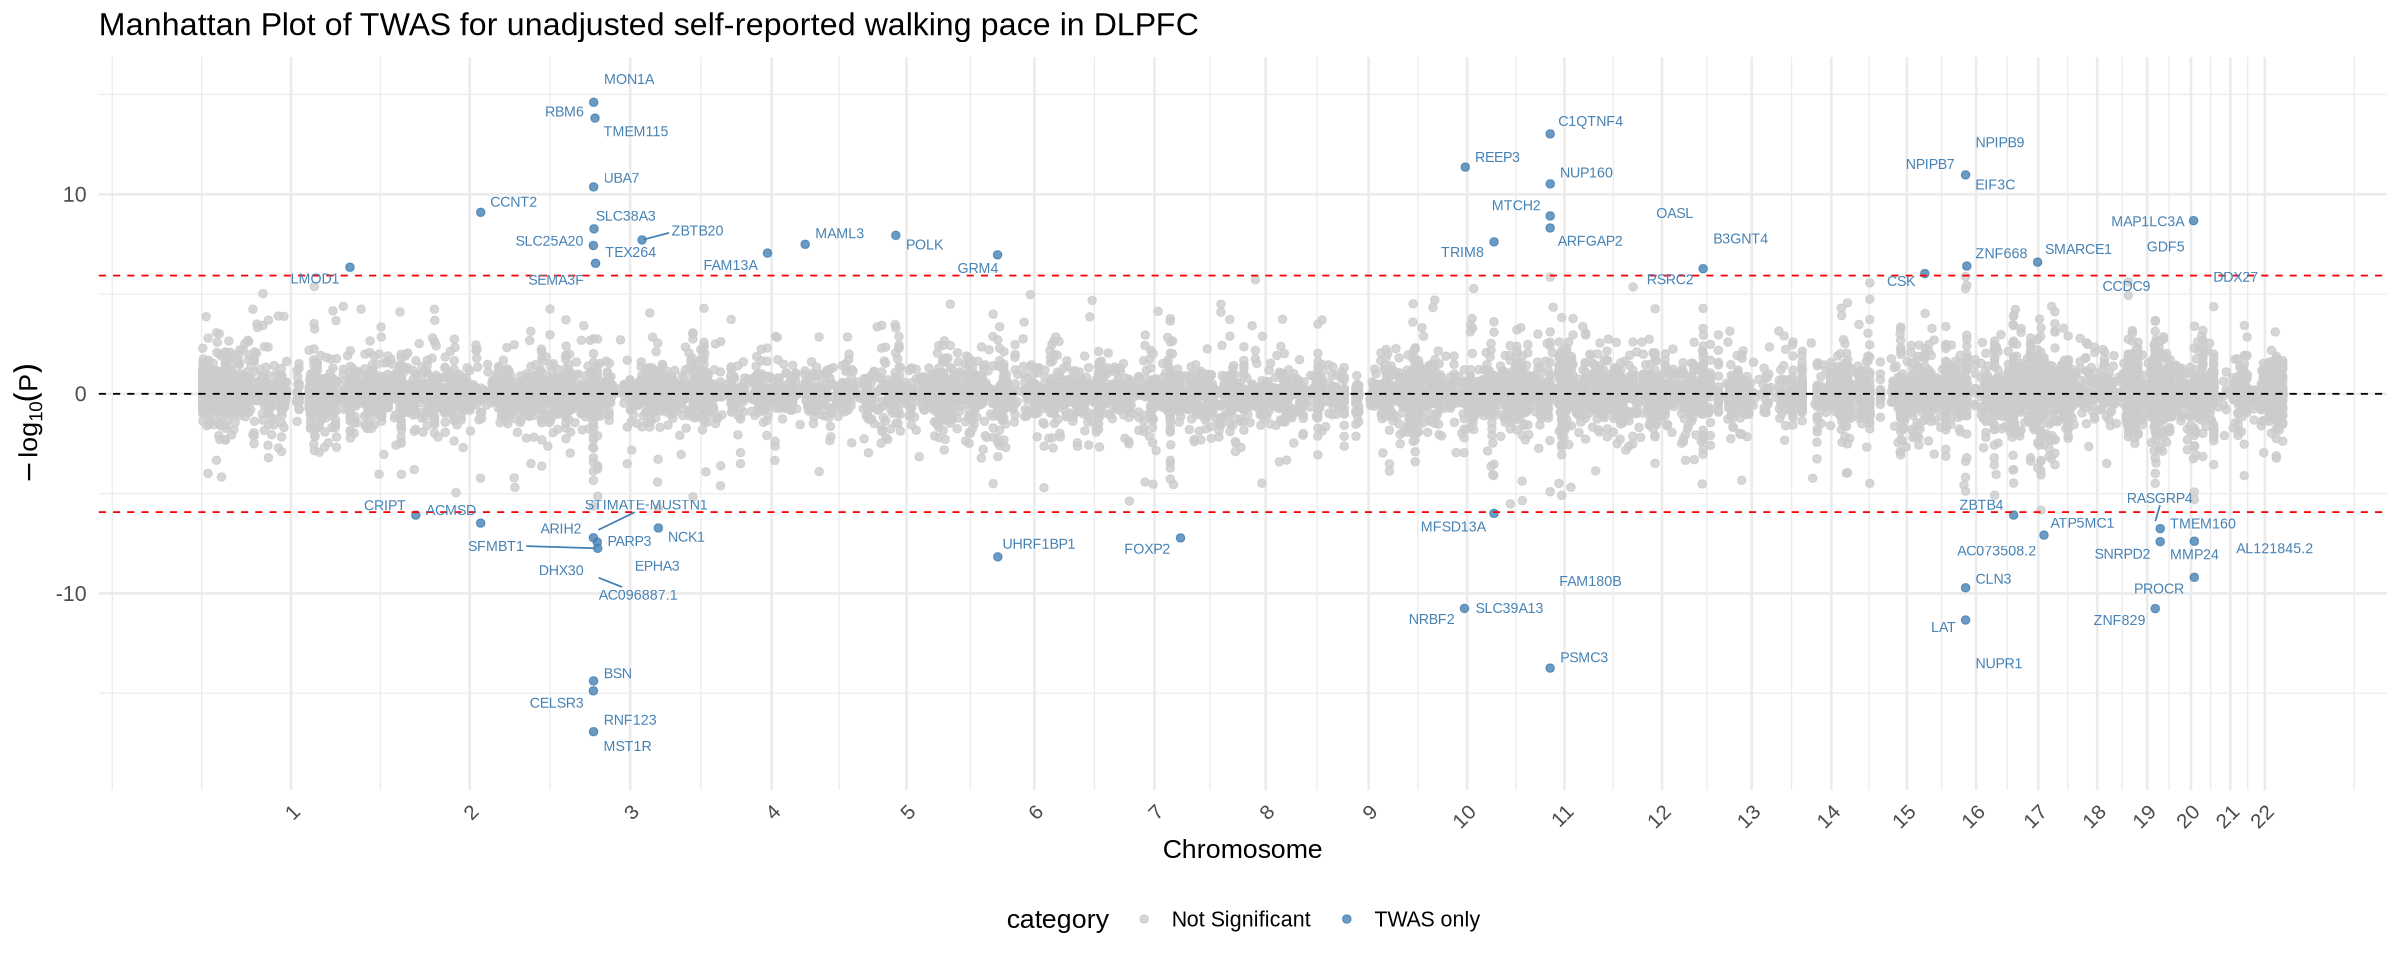

In [3]:
options(repr.plot.width = 20, repr.plot.height = 8)
p

In [4]:
ggsave("DLPFC_wp_unadjusted_TWAS_manhattan_plot.pdf", p, width = 18, height = 10, dpi = 300)
